# Visual Comparison

In [1]:
# Importing dependencies 
from utils import *
from ddpms import *  # DDPM specific parameters

# DIffusion timesteps
T = 1000

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Backbone networks
mnist_unet = ScoreNet((lambda t: torch.ones(1).to(device)))
mnist_unet_mu = ScoreNet2()

## Provided DDPM

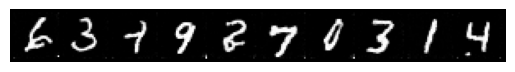

In [2]:
model = DDPM_classic(mnist_unet, T=T).to(device)
model.load_state_dict(torch.load("./model_checkpoints/model_classic.pth"))

get_samples(model, 10)

## Low-discrepancy sampling (VDM)

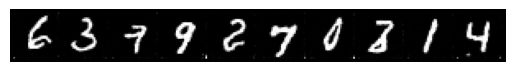

In [3]:
model = DDPM_low_discrepancy(mnist_unet, T=T, sampler="simple").to(device)
model.load_state_dict(torch.load("./model_checkpoints/model_lds_simple.pth"))

get_samples(model, 10)

## Low-discrepancy sampling (Sobol)

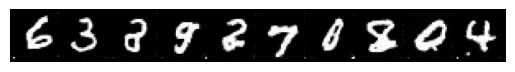

In [4]:
model = DDPM_low_discrepancy(mnist_unet, T=T, sampler="sobol").to(device)
model.load_state_dict(torch.load("./model_checkpoints/model_lds_sobol.pth"))

get_samples(model, 10)

## Importance sampling 

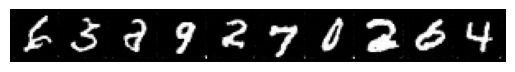

In [5]:
model = DDPM_importance(mnist_unet, T=T).to(device)
model.load_state_dict(torch.load("./model_checkpoints/model_is.pt"))

get_samples(model, 10)

## Predicting $x_0$

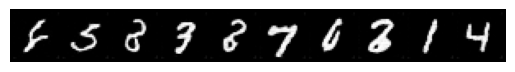

In [6]:
model = DDPM_x0(mnist_unet, T=T).to(device)
model.load_state_dict(torch.load("./model_checkpoints/model_x0.pt"))

get_samples(model, 10)

## Predicting $\mu$

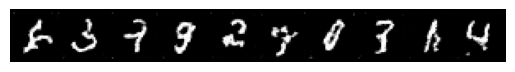

In [7]:
model = DDPM_mu(mnist_unet_mu, T=T).to(device)
model.load_state_dict(torch.load("./model_checkpoints/model_mu.pt"))

get_samples(model, 10)